<a href="https://colab.research.google.com/github/JangAY/TugasAkhir_PCD/blob/main/Project_UAS_PCD_Kelompok4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mendeteksi Keakuratan Metode Noise Salt and Pepper dengan Median Filter

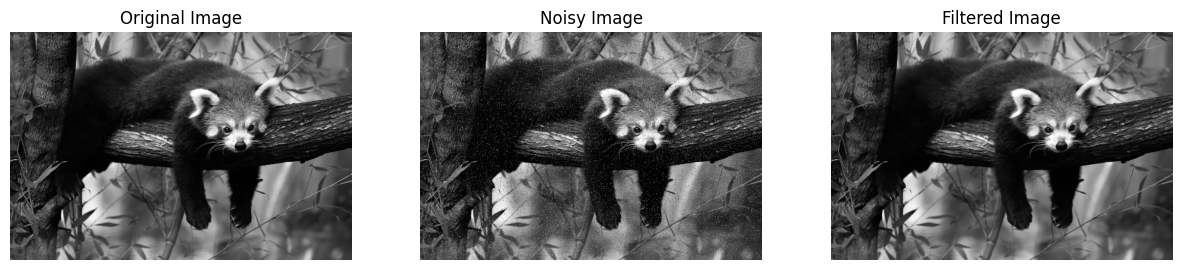

MSE: 12.738355900460975
PSNR: 37.07966982274692 dB


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [
        np.random.randint(0, i - 1, num_salt)
        for i in image.shape
    ]
    noisy_image[tuple(salt_coords)] = 255

    # Add pepper noise
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [
        np.random.randint(0, i - 1, num_pepper)
        for i in image.shape
    ]
    noisy_image[tuple(pepper_coords)] = 0

    return noisy_image

def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

def calculate_mse(original, filtered):
    return np.mean((original - filtered) ** 2)

def calculate_psnr(mse, max_pixel=255):
    if mse == 0:
        return float('inf')
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Load image
image_path = "/content/GettyImages.webp"  # Replace with your path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Add Salt and Pepper noise
salt_prob = 0.02
pepper_prob = 0.02
noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

# Apply Median Filter
kernel_size = 3
filtered_image = median_filter(noisy_image, kernel_size)

# Calculate MSE and PSNR
mse = calculate_mse(original_image, filtered_image)
psnr = calculate_psnr(mse)

# Show results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis("off")

plt.show()

print(f"MSE: {mse}")
print(f"PSNR: {psnr} dB")


# Penjelasan Hasil Program

1. **MSE (Mean Squared Error):** Mengukur perbedaan rata-rata kuadrat antara gambar asli dan gambar hasil filter. Nilai MSE yang lebih rendah menunjukkan kualitas filter yang lebih baik.

2. **PSNR (Peak Signal-to-Noise Ratio):** Mengukur kualitas gambar hasil filter dibandingkan dengan gambar asli dalam satuan desibel (dB). Nilai PSNR yang lebih tinggi menunjukkan kualitas gambar yang lebih baik.

## Langkah-Langkah Program

### 1. Penambahan Noise Salt and Pepper
Fungsi `add_salt_and_pepper_noise` digunakan untuk menambahkan noise Salt and Pepper ke gambar asli. Noise ini terdiri dari:
- **Salt Noise:** Titik-titik berwarna putih (nilai piksel 255).
- **Pepper Noise:** Titik-titik berwarna hitam (nilai piksel 0).

Noise ini ditambahkan secara acak dengan probabilitas yang ditentukan oleh parameter `salt_prob` dan `pepper_prob`.

### 2. Penerapan Median Filter
Fungsi `median_filter` digunakan untuk mengurangi noise dengan menggunakan Median Filter. Filter ini bekerja dengan mengganti nilai piksel dengan nilai median dari piksel-piksel di sekitarnya dalam ukuran kernel tertentu (misalnya, 3x3).

### 3. Perhitungan MSE dan PSNR
Fungsi `calculate_mse` menghitung nilai MSE antara gambar asli dan gambar hasil filter. Fungsi `calculate_psnr` kemudian menghitung nilai PSNR berdasarkan nilai MSE.

### 4. Visualisasi Hasil
Hasil program divisualisasikan dalam tiga gambar:
- **Original Image:** Gambar asli tanpa noise.
- **Noisy Image:** Gambar dengan noise Salt and Pepper.
- **Filtered Image:** Gambar hasil penghilangan noise menggunakan Median Filter.

## Hasil Evaluasi
Setelah menjalankan program, berikut adalah hasil evaluasi:

- **MSE:** Mengukur sejauh mana gambar hasil filter berbeda dari gambar asli.
- **PSNR:** Mengindikasikan kualitas hasil filter, dinyatakan dalam dB. Semakin tinggi nilai PSNR, semakin baik kualitas gambar hasil filter.

## Kesimpulan
Program ini menunjukkan bagaimana Median Filter dapat digunakan untuk mengurangi noise Salt and Pepper pada gambar. Dengan mengukur MSE dan PSNR, Agar dapat mengevaluasi efektivitas filter tersebut dalam menjaga kualitas gambar.

